# Oasis InfoByte : Data Science Tasks

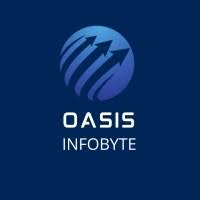

## Task 1: Iris Flower Classification

Target: From the Given Dataset, train a machine learning model that can learn from the measurements of the iris species and classify them.

## Author : Mohamed Sherif El-Boraie

### Imported Libraries

In [50]:
# Import the necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder


# Import the matplotlib and seaborn libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [7]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Load the dataset and displaying the inputs Data

In [8]:
# Load the iris dataset
dataset = 'D:/Mohamed Sheriff/Projects/Git Projects/OIBSIP/Task 1 -  IRIS FLOWER CLASSIFICATION/Dataset/Iris.csv'
Data_Frame= pd.read_csv(dataset)

In [9]:
Data_Frame

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
df = Data_Frame.copy()

In [12]:
# Remove the portion of the name 'Iris' so the species name is shorter
df['Species'] = df.Species.str.replace('Iris-', '')
# Drop the 'Id' column
df = df.drop('Id', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
# Count the occurrences of each species
df.Species.value_counts()


Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

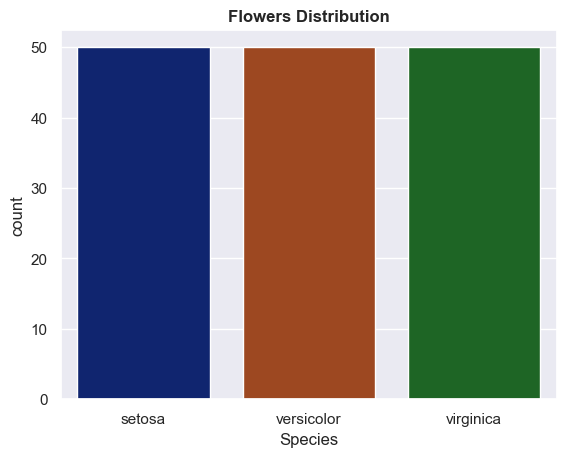

In [32]:
# Check the distribution of the target variable
sns.countplot(x='Species', data=df)
plt.title("Flowers Distribution", fontweight='bold')
plt.show()

In [14]:
# Print the summary statistics of the DataFrame
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
# Print the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Visualize Data

In [ ]:
# Extract the input features (Sepal Length, Sepal Width, Petal Length, Petal Width)
iris = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
iris

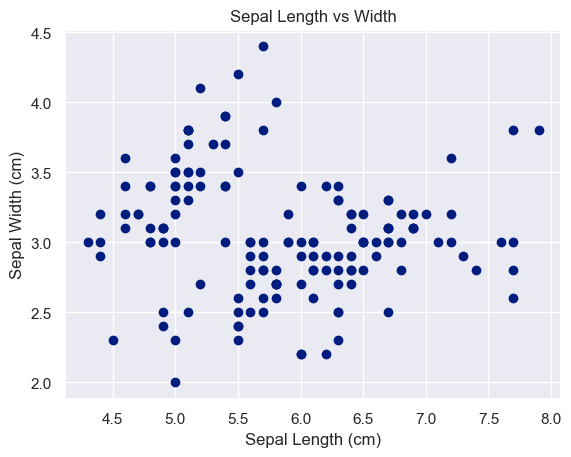

In [19]:
# Create a scatter plot of Sepal Length vs Sepal Width
ax = plt.axes()
ax.scatter(df.SepalLengthCm, df.SepalWidthCm)

ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');



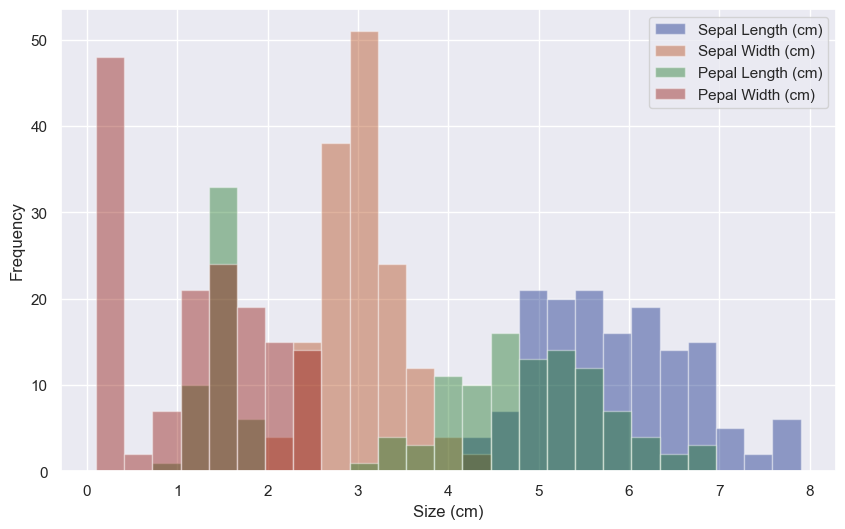

In [18]:
# Plot the distribution of the features
sns.set_context('notebook')
ax = df.plot.hist(bins=25, alpha=0.4 , figsize=(10,6))
ax.set_xlabel('Size (cm)');
plt.legend(('Sepal Length (cm)','Sepal Width (cm)','Pepal Length (cm)','Pepal Width (cm)'))

In [ ]:
# Create a KMeans model with 3 clusters, as it is given that Iris dataset contains 3 different species of flowers.
kmeans_new = KMeans(3)
# Fit the data
kmeans_new.fit(iris)
# Create a new data frame with the predicted clusters
y_kmeans = kmeans_new.fit_predict(iris)

In [ ]:
y_kmeans

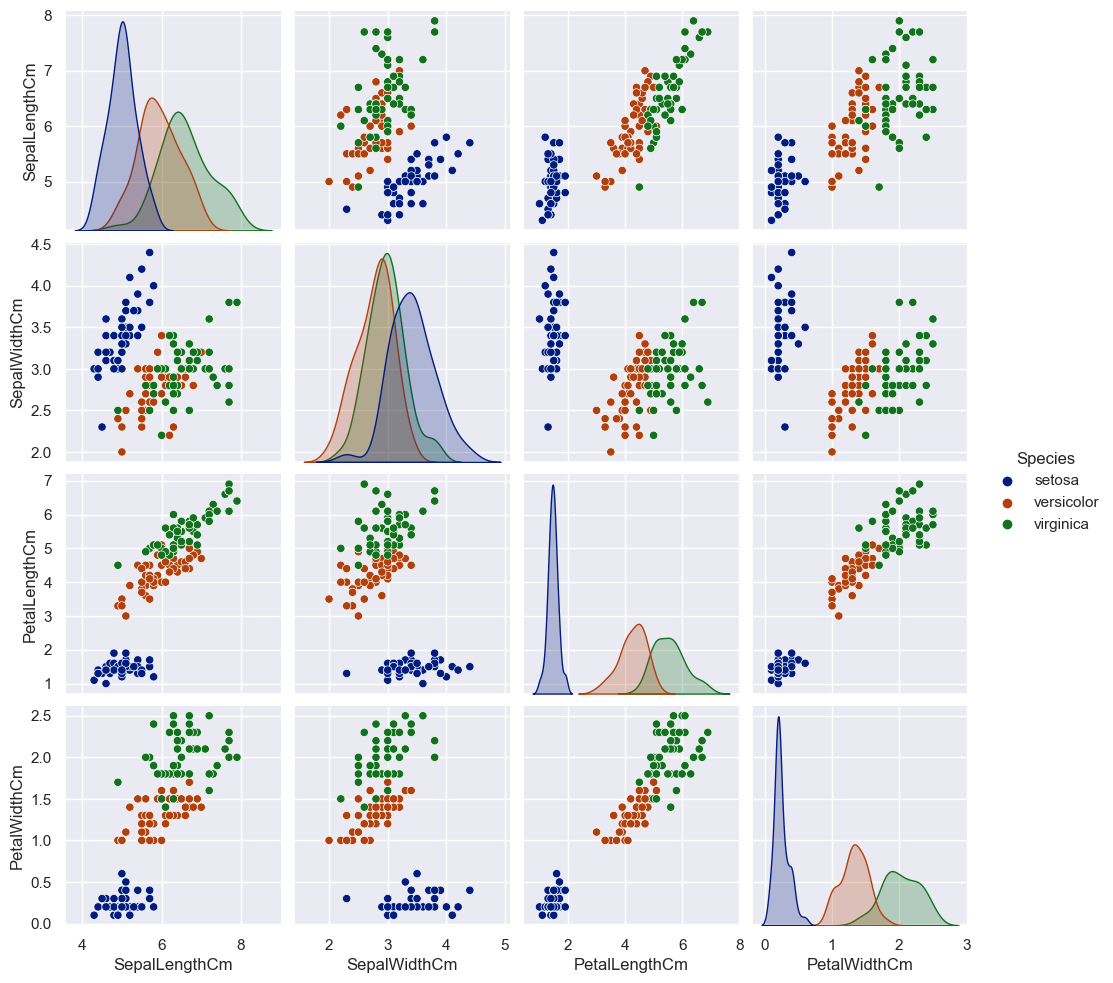

In [17]:
# Examine the correlation between each of the measurements
sns.set_context('notebook')
sns.set_palette('dark')
sns.pairplot(df, hue='Species');

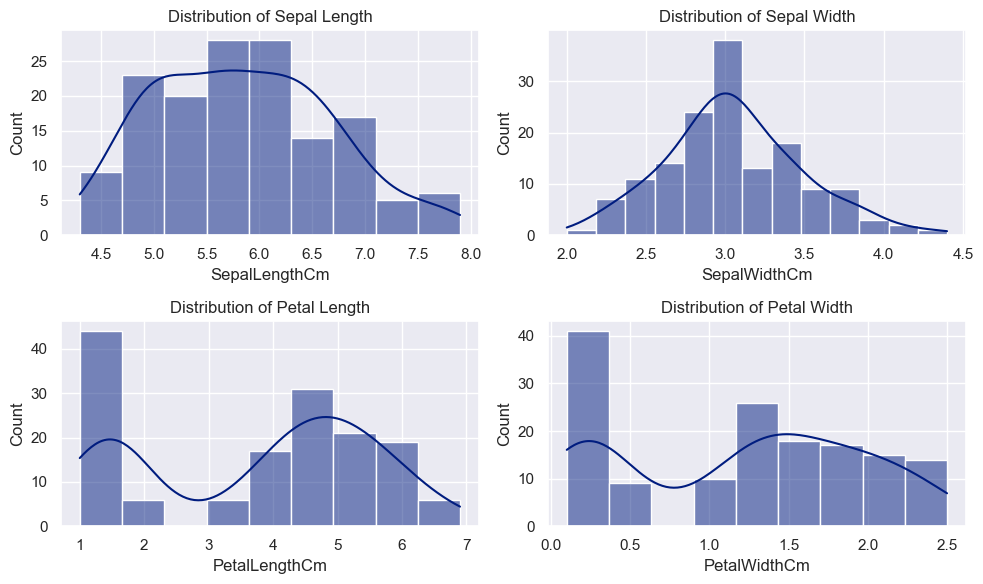

In [29]:
# Create a single plot with distribution plots for all features
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x="SepalLengthCm", kde=True)
plt.title('Distribution of Sepal Length')

plt.subplot(2, 2, 2)
sns.histplot(data=df, x="SepalWidthCm", kde=True)
plt.title('Distribution of Sepal Width')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x="PetalLengthCm", kde=True)
plt.title('Distribution of Petal Length')

plt.subplot(2, 2, 4)
sns.histplot(data=df, x="PetalWidthCm", kde=True)
plt.title('Distribution of Petal Width')

plt.tight_layout()
plt.show()

### Train Test Spilt

In [33]:
inputs = df.drop(['Species'], axis=1) 
target = df['Species']

In [40]:
#Perform train-test split to create a separate validation set for evaluating your model's performance. 
X_train, X_val, y_train, y_val = train_test_split(inputs, target, test_size=0.2, random_state=365)

In [42]:
#'setosa' --> 1
#'versicolor' --> 2
#'virginica' --> 3

In [56]:
# Encode the target classes into numeric format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)


In [52]:
target_names = ['setosa','versicolor','virginica']

### Hyperparamter Tuning using Different ML Algorthims / Evaluation

In [53]:
# Define the models and their respective parameter grids for hyperparameter tuning

models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10],'min_samples_leaf': [1,5,10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10 , 15]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights':['uniform','distance']}),
    'Naive Bayes': (GaussianNB(), {}),
    'XGBoost': (xgb.XGBClassifier(), {'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 7]}),
    'Neural Network': (MLPClassifier(), {'hidden_layer_sizes': [(100,),(50, 50), (20, 20, 20)], 'activation': ['relu', 'tanh'], 'solver': ['adam']}),
    'SVM': (SVC(), {'C': range(1, 151), 'kernel': ['poly'],'gamma': ['scale', 'auto']})

}

Training and evaluating Logistic Regression
--- Logistic Regression ---
Testing Data:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:


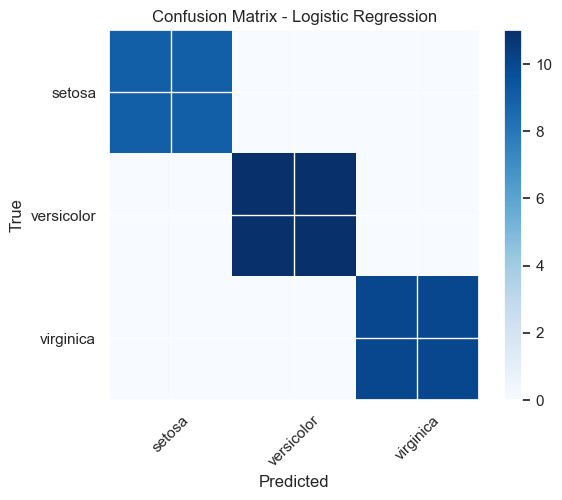

Best Model:LogisticRegression(C=10)
-------------------------------

Training and evaluating Random Forest
--- Random Forest ---
Testing Data:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:


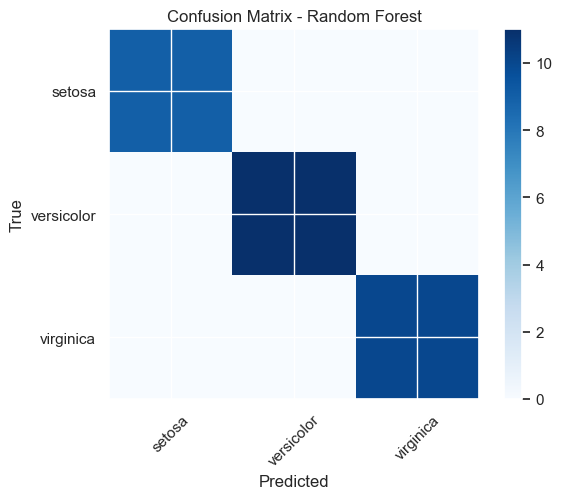

Best Model:RandomForestClassifier(min_samples_leaf=5, n_estimators=200)
-------------------------------

Training and evaluating Decision Tree
--- Decision Tree ---
Testing Data:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:


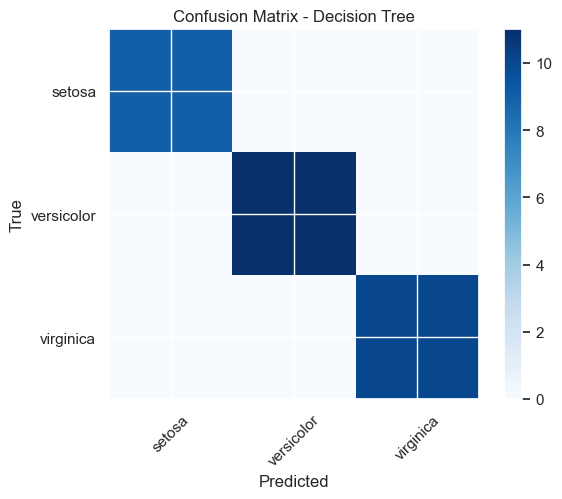

Best Model:DecisionTreeClassifier()
-------------------------------

Training and evaluating KNN
--- KNN ---
Testing Data:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:


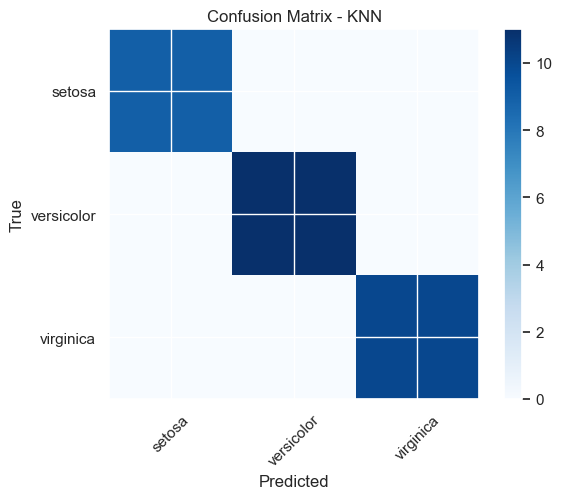

Best Model:KNeighborsClassifier(n_neighbors=7, weights='distance')
-------------------------------

Training and evaluating Naive Bayes
--- Naive Bayes ---
Testing Data:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:


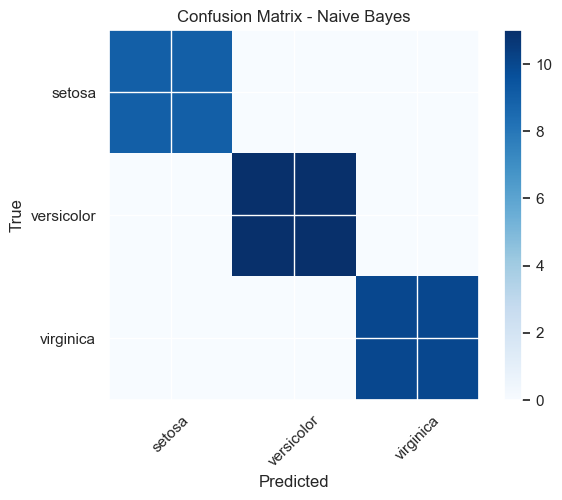

Best Model:GaussianNB()
-------------------------------

Training and evaluating XGBoost
--- XGBoost ---
Testing Data:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:


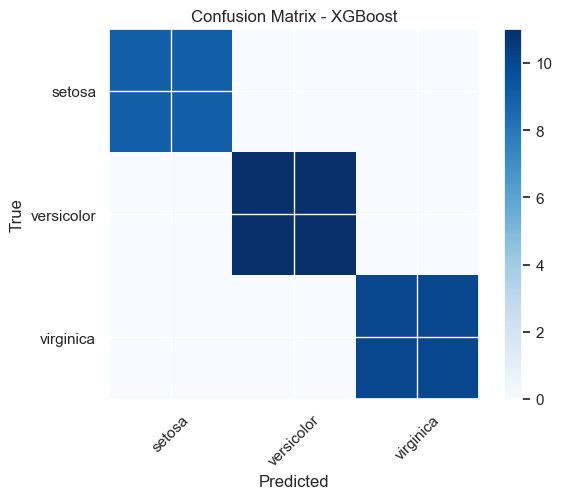

Best Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
-------------------------------

Training and evaluating Neural Network
--- Neural Network ---
Testing Data:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor  

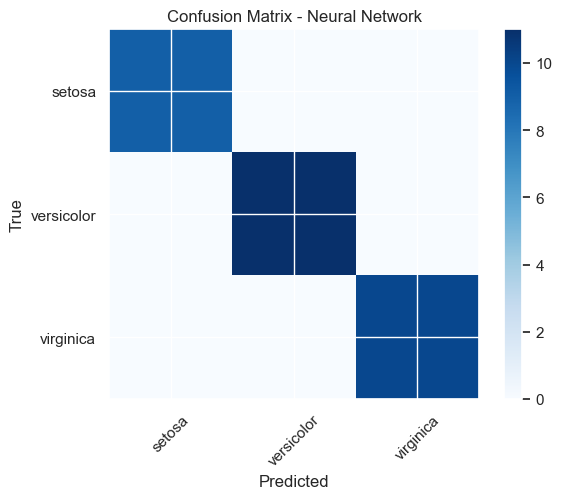

Best Model:MLPClassifier(hidden_layer_sizes=(50, 50))
-------------------------------

Training and evaluating SVM
--- SVM ---
Testing Data:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:


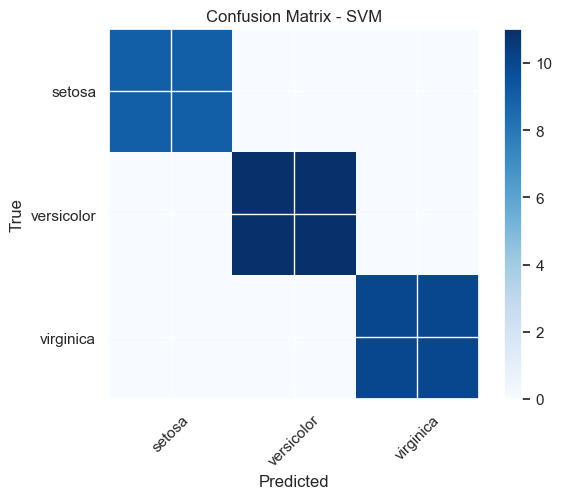

Best Model:SVC(C=1, kernel='poly')
-------------------------------



In [57]:
for model_name, (model, param_grid) in models.items():
    print(f"Training and evaluating {model_name}")
    
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train_encoded)
    best_model = grid_search.best_estimator_
    
    # Evaluation on testing data
    y_val_pred = best_model.predict(X_val)
    test_classification_report = classification_report(y_val_encoded, y_val_pred,  target_names= target_names )
    test_confusion_mat = confusion_matrix(y_val_encoded, y_val_pred)
    
    print(f"--- {model_name} ---")
    print("Testing Data:")
    print(test_classification_report)
    print("Confusion Matrix:")
    # Plot Confusion Matrix
    plt.figure()
    plt.imshow(test_confusion_mat, cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.colorbar()
    plt.xticks(np.arange(len(target_names)), target_names, rotation=45)
    plt.yticks(np.arange(len(target_names)), target_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    print(f"Best Model:{best_model}")
    
    print("-------------------------------\n")